## HW5

季宇桐 2100017820

#### 第一题

原方程解析解为：$u=\cos x$.

方法1，降阶法

方法2，二阶差分法

方法3：RK4

将三个方法合在一起写，以便比较，取$n=50$：

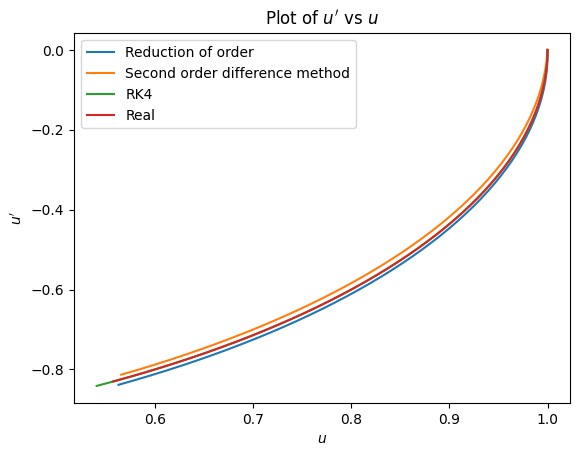

In [16]:
import numpy as np
import matplotlib.pyplot as plt

nstep = 50
xfinal = 1.0
xini = 0.0

#降阶法
y1 = np.zeros(50)
dy1 = np.zeros(50)
y1[0] = 1.0
dy1[0] = 0.0
xstep = (xfinal - xini) / nstep

file_name_out = 'plot1.1.dat'

with open(file_name_out, 'w') as file_out:
    for i in range(1, nstep):
        dy1[i] = dy1[i - 1] + xstep * (-y1[i - 1])
        y1[i] = y1[i - 1] + xstep * dy1[i - 1]

        output_line = f"{(i - 1) * xstep:.7e} {y1[i]:.7e} {dy1[i]:.7e}{np.cos((i - 1) * xstep):.7e} \n"
        file_out.write(output_line)

#二阶差分法
y2 = np.zeros(50)
dy2 = np.zeros(50)
xstep = (xfinal - xini) / nstep
y2[0] = 1.0
y2[1] = y2[0] + 0.0 * xstep
dy2[0] = 0

file_name_out = 'plot1.2.dat'

with open(file_name_out, 'w') as file_out:
    for i in range(1,nstep-1):
        y2[i + 1] = ( 2.0 - xstep**2 ) * y2[i] -  y2[i-1]

        dy2[i + 1] = (y2[i+1] - y2[i-1])/2/xstep

        output_line = f"{(i - 1) * xstep:.7e} {y2[i]:.7e} {dy2[i]:.7e}{np.cos((i - 1) * xstep):.7e} \n"
        file_out.write(output_line)

#RK4方法
def fa(m, n1, n0):
    return n1

def fb(m, n1, n0):
    return -n0

out = "plot1.3.dat"
data = []
u = []
du = []

y11 = 1.0
y21 = 0.0
xstep = (xfinal - xini) / nstep

r = xini
a = y11
b = y21

for i in range(nstep + 1):
    data.append([r, a, b])
    u.append(a)
    du.append(b)
    k1 = fa(r, b, a)
    l1 = fb(r, b, a)
    k2 = fa(r + xstep / 2., b + xstep * l1 / 2., a + xstep * k1 / 2.)
    l2 = fb(r + xstep / 2., b + xstep * l1 / 2., a + xstep * k1 / 2.)
    k3 = fa(r + xstep / 2., b + xstep * l2 / 2., a + xstep * k2 / 2.)
    l3 = fb(r + xstep / 2., b + xstep * l2 / 2., a + xstep * k2 / 2.)
    k4 = fa(r + xstep, b + xstep * l3, a + xstep * k3)
    l4 = fb(r + xstep, b + xstep * l3, a + xstep * k3)

    k = xstep * (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
    l = xstep * (l1 + 2 * l2 + 2 * l3 + l4) / 6.0

    r = r + xstep
    a = a + k
    b = b + l

data = np.array(data)
    
np.savetxt(out, data, fmt='%15.7f')
    
plt.plot(y1, dy1, label="Reduction of order")
plt.plot(y2, dy2, label="Second order difference method")
plt.plot(u, du, label="RK4")
xr = []
yr = []#真实值
for i in range(50):
    xr.append(np.cos(i/50))
    yr.append(-np.sin(i/50))

plt.plot(xr, yr, label="Real")
plt.legend()
plt.xlabel('$u$')
plt.ylabel('$u^\prime$')
plt.title('Plot of $u^\prime$ vs $u$')
plt.show()


可见三种方法在该区间上的性质基本一致，符合$u^\prime=-\sin x$ - $u=\cos x$的图像。RK4明显在n比较小的时候就可以快速收敛到真实结果（在独立python程序中运行代码并放大图片可以看到n=50时rk4和真实值差距非常小），降阶法和二阶差分法分别朝不同方向有误差偏离。

#### 第二题



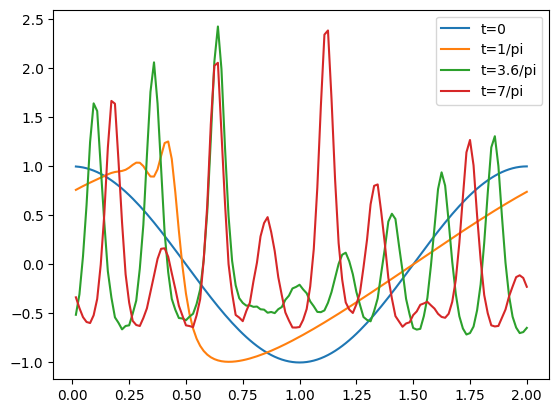

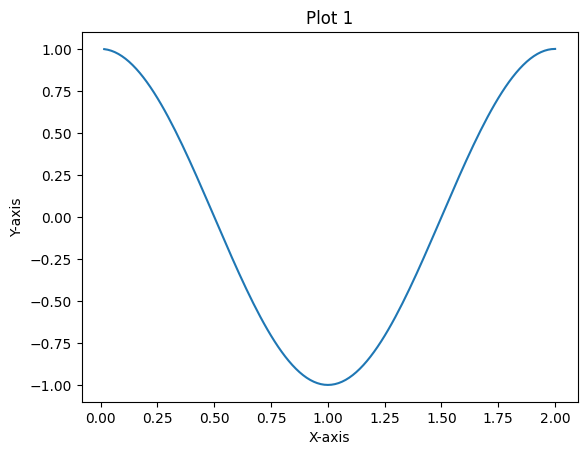

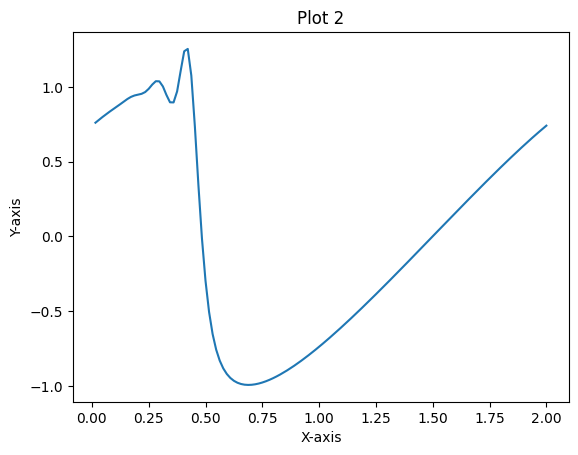

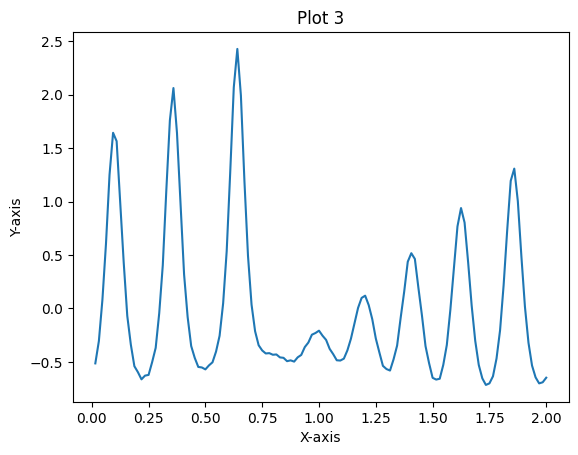

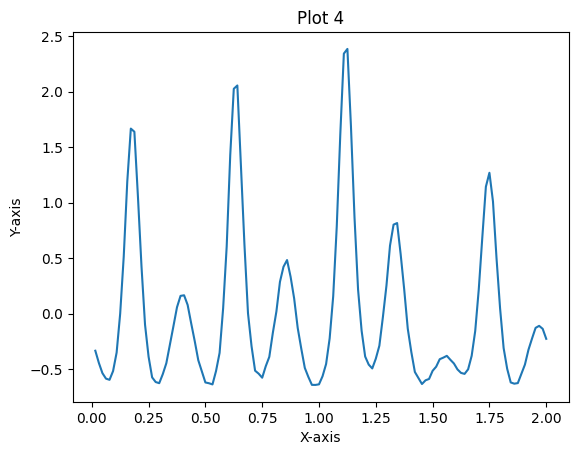

In [26]:
import numpy as np
import matplotlib.pyplot as plt

nxstep = 128
xfinal = 2.0
xini = 0.0
xstep = (xfinal - xini) / nxstep
ntstep = 100000
tfinal = 2.3
tini = 0.0
tstep = (tfinal - tini) / ntstep

u = np.zeros((nxstep + 4, ntstep + 2))

for j in range(nxstep + 2):
    u[j, 0] = np.cos(np.arccos(-1.0) * (xini + j * xstep))

u[nxstep + 1, 0] = u[1, 0]
u[nxstep + 2, 0] = u[2, 0]

for i in range(1, ntstep + 2):
    for j in range(2, nxstep + 2):
        u[j, i] = u[j, i - 1] - tstep * (
            1.0 / 6.0 / xstep * (u[j + 1, i - 1] + u[j, i - 1] + u[j - 1, i - 1]) *
            (u[j + 1, i - 1] - u[j - 1, i - 1]) +
            0.022**2 * (u[j + 2, i - 1] - 2.0 * u[j + 1, i - 1] + 2.0 * u[j - 1, i - 1] - u[j - 2, i - 1]) /
            2.0 / xstep**3
        )

    u[0, i] = u[0, i - 1] - tstep * (
        1.0 / 6.0 / xstep * (u[1, i - 1] + u[0, i - 1] + u[nxstep-1, i - 1]) * (u[1, i - 1] - u[nxstep-1, i - 1]) +
        0.022**2 * (u[2, i - 1] - 2.0 * u[1, i - 1] + 2.0 * u[nxstep-1, i - 1] - u[nxstep-2, i - 1]) /
        2.0 / xstep**3
    )

    u[1, i] = u[1, i - 1] - tstep * (
        1.0 / 6.0 / xstep * (u[2, i - 1] + u[1, i - 1] + u[0, i - 1]) * (u[2, i - 1] - u[0, i - 1]) +
        0.022**2 * (u[3, i - 1] - 2.0 * u[2, i - 1] + 2.0 * u[0, i - 1] - u[nxstep-1, i - 1]) /
        2.0 / xstep**3
    )

    u[nxstep + 1, i] = u[1, i]
    u[nxstep + 2, i] = u[2, i]

#t=0
x1 = []
y1 = []
for j in range(1,nxstep + 1):
    x1.append(j * xstep)
    y1.append(u[j , 0])

plt.plot(x1, y1, label="t=0")

#t=1/pi=0.31830988618
x2 = []
y2 = []
for j in range(1,nxstep + 1):
    x2.append(j * xstep)
    y2.append(u[j , 13839])

plt.plot(x2, y2, label="t=1/pi")

#t=3.6/pi
x3 = []
y3 = []
for j in range(1,nxstep + 1):
    x3.append(j * xstep)
    y3.append(u[j , 49822])

plt.plot(x3, y3, label="t=3.6/pi")

#t=7/pi
x4 = []
y4 = []
for j in range(1,nxstep + 1):
    x4.append(j * xstep)
    y4.append(u[j , 96877])

plt.plot(x4, y4, label="t=7/pi")

plt.legend()
plt.show()

# Plot 1
plt.figure(1)
plt.plot(x1, y1)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('$t=0$')
plt.savefig('plot1.png')

# Plot 2
plt.figure(2)
plt.plot(x2, y2)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('$t=1/\pi$')
plt.savefig('plot2.png')

# Plot 3
plt.figure(3)
plt.plot(x3, y3)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('$t=3.6/\pi$')
plt.savefig('plot3.png')

# Plot 4
plt.figure(4)
plt.plot(x4, y4)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('$t=7/\pi$')
plt.savefig('plot4.png')

plt.show()


修改PPT中代码的bug，可以看到几个特殊帧已经很接近理论情况，大t时的毛刺也有所改善。

#### 第三题

c:\Users\Jerton\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


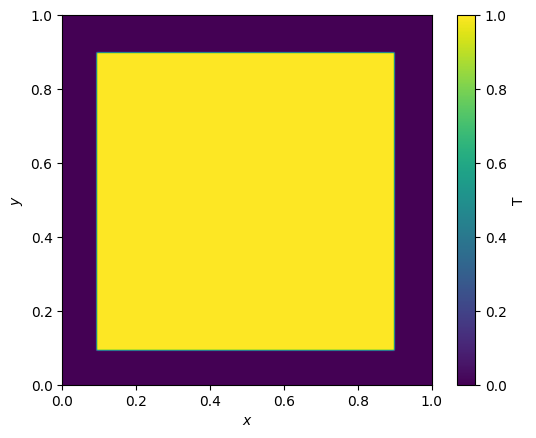

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

#参数
L = 1.0  
nx = 128
ny = 128
nt = 1000  #更改nt可以改变模拟的时间长度
dt = 0.00001 

dx = L / nx
dy = L / ny
x = np.linspace(0, L, nx)
y = np.linspace(0, L, ny)
X, Y = np.meshgrid(x, y)

#初条件
T = np.zeros((ny, nx))
T[int(0.1 * ny):int(0.9 * ny), int(0.1 * nx):int(0.9 * nx)] = 1.0 

#边条件
T[:, 0] = 0.0 
T[:, nx-1] = 0.0
T[0, :] = T[1, :]  
T[ny-1, :] = T[ny-2, :]  

#调用快速傅里叶变换函数
kx = np.fft.fftfreq(nx, d=dx) * 2 * np.pi
ky = np.fft.fftfreq(ny, d=dy) * 2 * np.pi
KX, KY = np.meshgrid(kx, ky)
K_squared = KX**2 + KY**2

#动画
fig, ax = plt.subplots()
img = ax.imshow(T, extent=(0, L, 0, L), origin='lower', cmap='viridis')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.colorbar(img, label='T')
text = ax.text(0.02, 0.95, '', transform=ax.transAxes, color='white')

def update(frame):
    global T
    T_hat = np.fft.fft2(T)
    T_hat *= np.exp(-1.0 * K_squared * dt) #D=1
    T = np.real(np.fft.ifft2(T_hat))
    img.set_array(T)
    text.set_text('Time Step: {}'.format(frame))

animation = FuncAnimation(fig, update, frames=nt, interval=50, repeat=False)
plt.show()



可以把这段代码单独放在.py文件中运行得到动图，随文件也打包了动态演化图（需要安装ImageMagick保存GIF）。

#### 第四题

1.$\lambda = 1$时，有
\begin{aligned}
    u(x,y,t)=X(x)Y(y)T(t)\\
    \frac{X^{\prime\prime}}{X}+\frac{Y^{\prime\prime}}{Y}=\frac{T^{\prime\prime}}{T}=-k\\
    T = A \sin (\sqrt{k}t) + B \cos (\sqrt{k}t)
\end{aligned}

由边界条件 $A = 0$ , 又由初条件$u(x,y,0)=\sin (\pi x) \sin (2\pi y)$ 及边条件 $u=0$ , 

得$X=\sin (\pi x), Y=\sin (2\pi y)$,带回方程得到 $k = 5\pi^2$,最后有

$u = \sin (\pi x) \sin (2\pi y) \cos (\sqrt{5}\pi t)$

这里取系数为1，实际上 $u$ 可以乘任何非零系数。

2.二维差分如下：

边条件只需让二维数组的边值全部设置为0，初条件是让u1=u0，这样差分的导数在初始就是0.


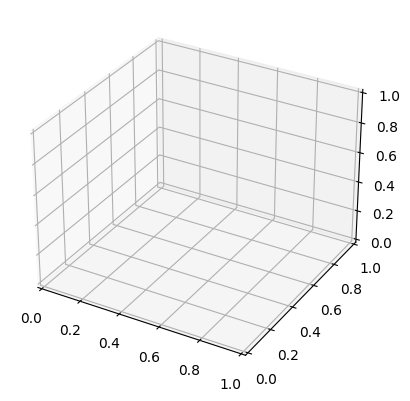

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# 参数
L = 1.0
nx = 50
ny = 50
nt = 100
c = 1
dx = L / nx
dy = L / ny
dt = 0.01
lam = c * dt / dx

# 初始化
u0 = np.zeros((nx, ny))
for i in range(nx):
    for j in range(ny):
        u0[i][j] = np.sin(np.pi * i * dx) * np.sin(2 * np.pi * j * dy)

# 边界条件
u0[0, :] = 0
u0[-1, :] = 0
u0[:, 0] = 0
u0[:, -1] = 0
u1 = u0.copy()
unew = u1.copy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initialize X and Y based on your code
x = np.linspace(0, L, nx)
y = np.linspace(0, L, ny)
X, Y = np.meshgrid(y, x)

def update(frame):
    global u0, u1, unew
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            unew[i, j] = 2 * u1[i, j] - u0[i, j] + lam ** 2 * (u1[i + 1, j] - 2 * u1[i, j] + u1[i - 1, j]) + lam ** 2 * (u1[i, j + 1] - 2 * u1[i, j] + u1[i, j - 1])
    u0 = u1.copy()
    u1 = unew.copy()
    ax.clear()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_zlim(-1, 1)
    ax.set_zticks([-1, -0.5, 0, 0.5, 1])
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$u$')
    ax.plot_surface(X, Y, unew, cmap='viridis', shade=False)

ani = animation.FuncAnimation(fig, update, frames=nt, interval=100, repeat=False)
plt.show()


这里已经给出了第四问中$\Delta x = \Delta y$情形下的动画，见文档GIF，参数选择为

$\begin{aligned}
\Delta x = 1/50\\
\Delta y = 1/50\\
\Delta t = 0.01
\end{aligned}$

3.取$\Delta x = \Delta y = 1/50$ 时，$\Delta t\le 0.01414$,我们取$t=0.01$和$t=0.018$,见文档中图片problem4.4和4.3.1，可以看到后者在约一个周期迅速崩溃。

再比如取

$\begin{aligned}
\Delta x = 1/50\\
\Delta y = 1/100
\end{aligned}$

有$\Delta t\le 0.009$，我们取0.015，0.010和0.005，为图片4.3.2、4.3.3和4.3.4，可以看到在0.015时崩溃较快，0.010时崩溃不明显，0.005时未崩溃。